# Tutorial 1: Regression

**Q1.1:** Visualize the dataset plots

**Q1.2:** Build a linear model

**Q2.2:** Solve the linear model

**Q3.2:** Solve the linear model

In [1]:
# !pip install kagglehub

In [2]:
import kagglehub
import os

# Download latest version
dataDir = 
is not os.path.exists('../data/'):
is not os.path.exists('../data/')

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4.63k/4.63k [00:00<00:00, 2.97MB/s]

Extracting files...
Path to dataset files: /Users/nicolehartman/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [4]:
import os

In [5]:
os.listdir(path)

['Housing.csv']

In [49]:
import pandas as pd
df = pd.read_csv(f'{path}/Housing.csv')
df.index = np.arange(1,len(df)+1) # reset the index to start from 1

In [50]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [51]:
df['price ($1M)'] = df['price'] // int(1e6)

In [52]:
df[['area','bedrooms','price ($1M)']] #.head()

,area,bedrooms,price ($1M)
1,7420,4,13
2,8960,4,12
3,9960,3,12
4,7500,4,12
5,7420,4,11
...,...,...,...
541,3000,2,1
542,2400,3,1
543,3620,2,1
544,2910,3,1


In [30]:
len(df)

545

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

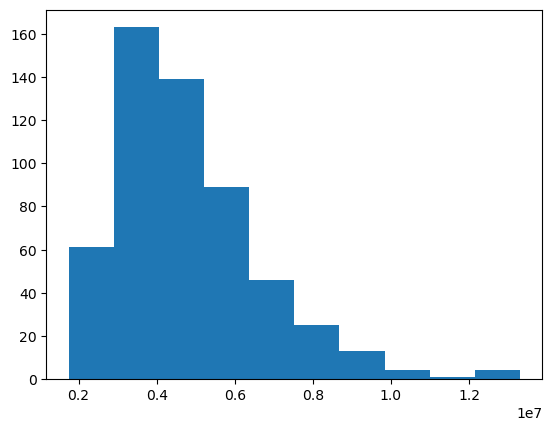

In [31]:
import matplotlib.pyplot as plt
plt.hist(df['price'])

(array([ 13.,  26.,  61., 114., 112.,  93.,  68.,  39.,  14.,   5.]),
 array([14.37512635, 14.57794117, 14.780756  , 14.98357082, 15.18638564,
        15.38920047, 15.59201529, 15.79483012, 15.99764494, 16.20045977,
        16.40327459]),
 <BarContainer object of 10 artists>)

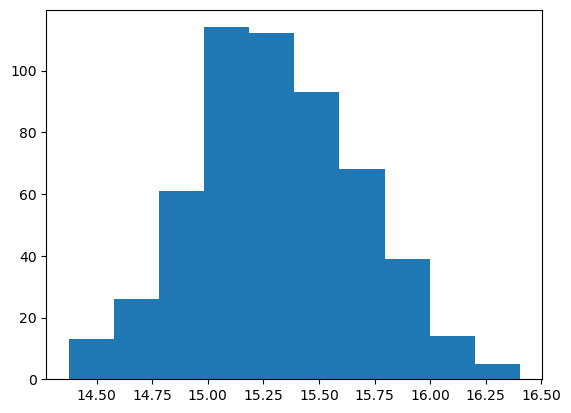

In [32]:
import numpy as np
plt.hist(np.log(df['price']))

**Fun problem for later in the week:** 
- Can we do cluster analysis to determine if there are ``sub-clusters'' inside of the dataset?

Let's look at the variables that we're plotting!!

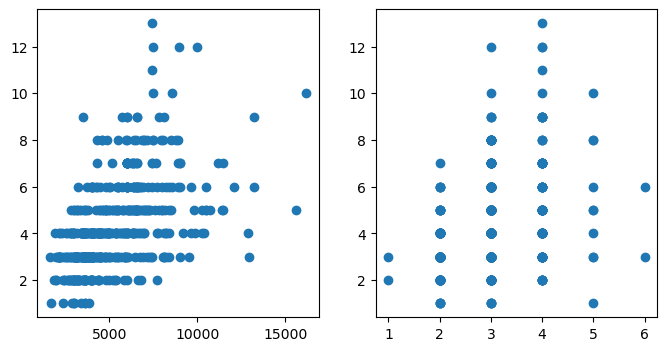

In [33]:
'''

'''
fig, ax = plt.subplots(1,2,figsize=(8,4))

for axi,col in zip(ax, ['area','bedrooms']):
    axi.scatter(df[col],df['price ($1M)'])
    

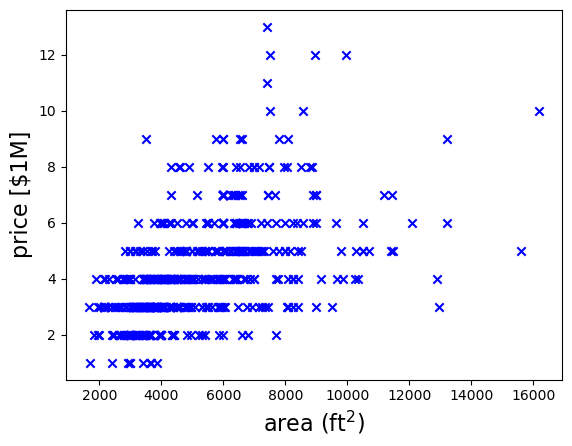

In [36]:
plt.scatter(df['area'],df['price ($1M)'],marker='x',color='b')
plt.xlabel('area (ft$^2$)',fontsize=16)
plt.ylabel('price [$1M]',fontsize=16)
plt.show()

**Task 1:** Build a linear model to predict the price of of the Y